# Step 3. Baseline Model

[//]: # (TODO: Write methodology and observations here)

In [1]:
# Imports and environmental setups

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

# Custom utils functions
from utils import dataset
from utils.visualization import plot_learning_curve
from utils.visualization import visualize_predictions


plt.style.use('ggplot')
model_name = 'baseline'
dir_raw_dataset = '../data/raw/'
dir_train_dataset = '../data/train/'
dir_test_dataset = '../data/test/'
dir_log = '../log/' + model_name

## 3.1. Load Dataset

In [2]:
df = dataset.load(dir_train_dataset)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13073 entries, 0 to 13072
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ImgPath       13073 non-null  object 
 1   FileType      13073 non-null  object 
 2   Width         13073 non-null  int64  
 3   Height        13073 non-null  int64  
 4   Ratio         13073 non-null  float64
 5   Mode          13073 non-null  object 
 6   Bands         13073 non-null  object 
 7   Transparency  13073 non-null  bool   
 8   Animated      13073 non-null  bool   
 9   Class         13073 non-null  object 
dtypes: bool(2), float64(1), int64(2), object(5)
memory usage: 842.7+ KB


In [4]:
df.sample(n=42, random_state=42)

,ImgPath,FileType,Width,Height,Ratio,Mode,Bands,Transparency,Animated,Class
10022,Rosy/000274.jpg,jpg,512,512,1.0,RGB,R G B,False,False,Rosy
11756,Tana/000414.jpg,jpg,512,512,1.0,RGB,R G B,False,False,Tana
12394,Tana/001211.jpg,jpg,512,512,1.0,RGB,R G B,False,False,Tana
11387,Rosy/rosy_60.jpg,jpg,512,512,1.0,RGB,R G B,False,False,Rosy
7551,Lisianthus/lisianthus_247.jpg,jpg,512,512,1.0,RGB,R G B,False,False,Lisianthus
6202,Hydrangeas/hydrangeas_187.jpg,jpg,512,512,1.0,RGB,R G B,False,False,Hydrangeas
5714,Hydrangeas/001008.jpg,jpg,512,512,1.0,RGB,R G B,False,False,Hydrangeas
7990,Lisianthus/lisianthus_761.jpg,jpg,512,512,1.0,RGB,R G B,False,False,Lisianthus
12896,Tana/tana_458.jpg,jpg,512,512,1.0,RGB,R G B,False,False,Tana
3288,Chrysanthemum/000005.jpg,jpg,512,512,1.0,RGB,R G B,False,False,Chrysanthemum


In [5]:
train, val = train_test_split(df, shuffle=True, test_size=0.25, random_state=42)

print(f'Train data: {train.shape[0]} samples, Validation Data: {val.shape[0]} samples.')

Train data: 9804 samples, Validation Data: 3269 samples.


## 3.2. Baseline Model Setup and Training

### 3.2.1. Baseline Parameters

In [6]:
# Model Parameters
IMG_SIZE = 256
BATCH_SIZE = 512
INPUT_DIM = (IMG_SIZE, IMG_SIZE, 3)  # RGB - 3 channels images
HIDDEN_LAYER_DIM = 128
OUTPUT_CLASSES = 8  # One-hot encoded: 8 different classes

# Training Parameters
EPOCHS = 32
LEARNING_RATE = 1e-5

### 3.2.2. Model Setup

In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=INPUT_DIM),
    tf.keras.layers.Dense(HIDDEN_LAYER_DIM, activation='relu'),
    tf.keras.layers.Dense(HIDDEN_LAYER_DIM, activation='relu'),
    tf.keras.layers.Dense(HIDDEN_LAYER_DIM, activation='relu'),
    tf.keras.layers.Dense(HIDDEN_LAYER_DIM, activation='sigmoid'),
    tf.keras.layers.Dense(OUTPUT_CLASSES),
], name=model_name)
model.summary()

Model: "baseline"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 196608)            0         
                                                                 
 dense (Dense)               (None, 128)               25165952  
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 128)               16512     
                                                                 
 dense_4 (Dense)             (None, 8)                 1032      
                                                                 
Total params: 25,216,520
Trainable params: 25,216,520
Non-

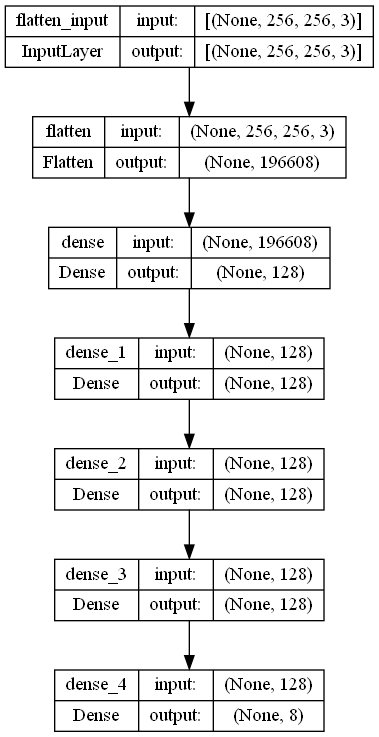

In [8]:
tf.keras.utils.plot_model(model, show_shapes=True, to_file='images/BaselineModel-Diagram.png')

### 3.2.3. Training

In [9]:
train['Class'] = train['Class'].astype('str')
train_datagen = ImageDataGenerator(data_format='channels_last')
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train,
    directory=dir_train_dataset,
    x_col='ImgPath',
    y_col='Class',
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    seed=42
)

val['Class'] = val['Class'].astype('str')
val_datagen = ImageDataGenerator(data_format='channels_last')
val_generator = val_datagen.flow_from_dataframe(
    dataframe=val,
    directory=dir_train_dataset,
    x_col='ImgPath',
    y_col='Class',
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    seed=42
)

Found 9804 validated image filenames belonging to 8 classes.
Found 3269 validated image filenames belonging to 8 classes.


In [10]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=dir_log)

model.compile(
    optimizer=Adam(learning_rate=LEARNING_RATE),
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=['categorical_accuracy'],
)

history = model.fit(
    train_generator, validation_data=val_generator,
    epochs=EPOCHS,
    verbose=2, callbacks=[tensorboard_callback]
)

Epoch 1/32
20/20 - 40s - loss: 2.0919 - categorical_accuracy: 0.1405 - val_loss: 2.0773 - val_categorical_accuracy: 0.1303 - 40s/epoch - 2s/step
Epoch 2/32
20/20 - 34s - loss: 2.0710 - categorical_accuracy: 0.1593 - val_loss: 2.0636 - val_categorical_accuracy: 0.1548 - 34s/epoch - 2s/step
Epoch 3/32
20/20 - 34s - loss: 2.0594 - categorical_accuracy: 0.1652 - val_loss: 2.0687 - val_categorical_accuracy: 0.1670 - 34s/epoch - 2s/step
Epoch 4/32
20/20 - 34s - loss: 2.0577 - categorical_accuracy: 0.1791 - val_loss: 2.0542 - val_categorical_accuracy: 0.1872 - 34s/epoch - 2s/step
Epoch 5/32
20/20 - 34s - loss: 2.0536 - categorical_accuracy: 0.1905 - val_loss: 2.0820 - val_categorical_accuracy: 0.1539 - 34s/epoch - 2s/step
Epoch 6/32
20/20 - 34s - loss: 2.0787 - categorical_accuracy: 0.1444 - val_loss: 2.0697 - val_categorical_accuracy: 0.1722 - 34s/epoch - 2s/step
Epoch 7/32
20/20 - 34s - loss: 2.0668 - categorical_accuracy: 0.1726 - val_loss: 2.0671 - val_categorical_accuracy: 0.1563 - 34s/e

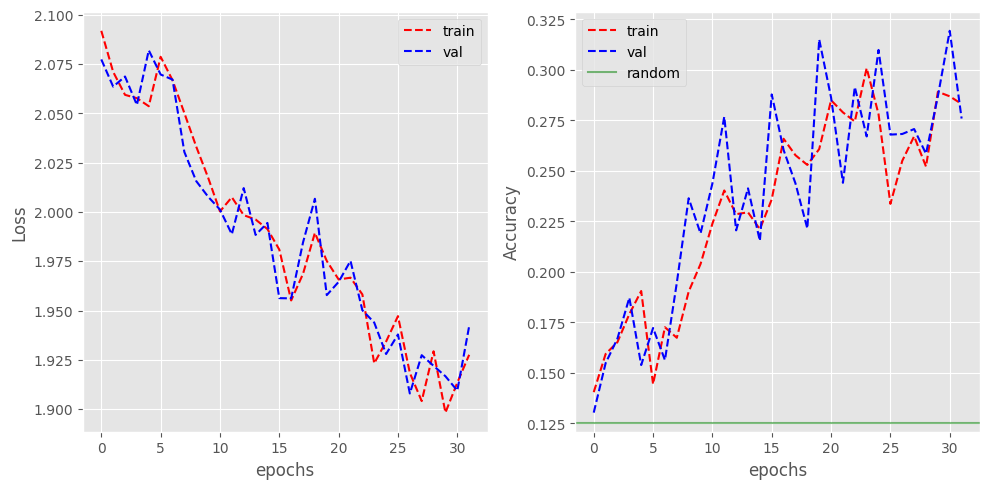

In [11]:
plot_learning_curve(
    history.history['loss'],
    history.history['val_loss'],
    history.history['categorical_accuracy'],
    history.history['val_categorical_accuracy'],
    to_file='images/BaselineModel-LearningCurve.png'
)

## 3.3. Baseline Model Performance

Evaluated from test dataset in `./data/test/`

In [12]:
test = dataset.load(dir_test_dataset)
test['Class'] = test['Class'].astype('str')
test_datagen = ImageDataGenerator(data_format='channels_last')
test_generator = test_datagen.flow_from_dataframe(
    dataframe=test,
    directory=dir_test_dataset,
    x_col='ImgPath',
    y_col='Class',
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=1,
    class_mode='categorical',
    seed=42
)

model.evaluate(test_generator)

Found 3271 validated image filenames belonging to 8 classes.
3271/3271 [==============================] - 37s 11ms/step - loss: 1.9423 - categorical_accuracy: 0.2657


[1.9422533512115479, 0.26566800475120544]

In [13]:
# visualize_predictions(model, test_generator, to_file='images/BaselineModel-SamplePredictions.png')